<a href="https://colab.research.google.com/github/KHU0112/DATA/blob/main/9_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **타이타닉 데이터셋 분류 모델 학습 및 평가**

## Kaggle API 인증하고 데이터 다운 받기

In [ ]:
# Kaggle API를 사용하여 데이터 다운로드
!pip install kaggle

# Kaggle API 인증 파일 업로드
from google.colab import files
files.upload()

# Kaggle API 인증
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# 타이타닉 데이터셋 다운로드]]]]]]]]]]]]]]]]]]]]]]]]]
!kaggle competitions download -c titanic

# 압축 해제
!unzip titanic.zip

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 30.4MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df = pd.read_csv("test.csv")

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
sub_df = pd.read_csv("gender_submission.csv")

sub_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
!kaggle competitions submit -c titanic -f gender_submission.csv -m "Message"

100% 3.18k/3.18k [00:00<00:00, 4.03kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

## 데이터 전처리

### 결측치 처리 (직접 처리해볼만한 경우)

In [ ]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train_df[train_df['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [ ]:
# Embarked가 결측값인 사람들의 Embarked를 'S'로 채우기
train_df.loc[train_df['Embarked'].isna(), 'Embarked'] = 'S'

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
test_df[test_df['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [ ]:
# Embarked가 결측값인 사람들의 Fare를 7.5로 채우기
test_df.loc[test_df['Fare'].isna(), 'Fare'] = 7.5

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 결측치 처리 (나이의 경우)

In [ ]:
# 'Master.'가 포함된 Name의 Age 중앙값 계산
master_median_age = train_df[train_df['Name'].str.contains('Master.', na=False)]['Age'].median()
print(master_median_age)

3.5


In [ ]:
# Age가 결측인 경우 'Master.'가 포함된 Name의 중앙값으로 대체
train_df.loc[train_df['Age'].isna() & train_df['Name'].str.contains('Master.', na=False), 'Age'] = master_median_age
test_df.loc[test_df['Age'].isna() & test_df['Name'].str.contains('Master.', na=False), 'Age'] = master_median_age

In [ ]:
# Pclass와 Sex로 그룹화하여 Age의 중앙값 계산
median_ages = train_df.groupby(['Pclass', 'Sex'])['Age'].median().reset_index()
median_ages = median_ages.rename(columns={'Age': 'Median_Age'})

# Age가 결측인 경우를 찾아 Pclass와 Sex의 Median_Age로 채우기
def fill_age(row):
    if pd.isna(row['Age']):
        return median_ages[(median_ages['Pclass'] == row['Pclass']) & (median_ages['Sex'] == row['Sex'])]['Median_Age'].values[0]
    else:
        return row['Age']

train_df['Age'] = train_df.apply(fill_age, axis=1)
test_df['Age'] = test_df.apply(fill_age, axis=1)

In [ ]:
train_df.drop('Cabin', axis = 1, inplace = True)
test_df.drop('Cabin', axis = 1, inplace = True)

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


### 수치형 데이터의 전처리

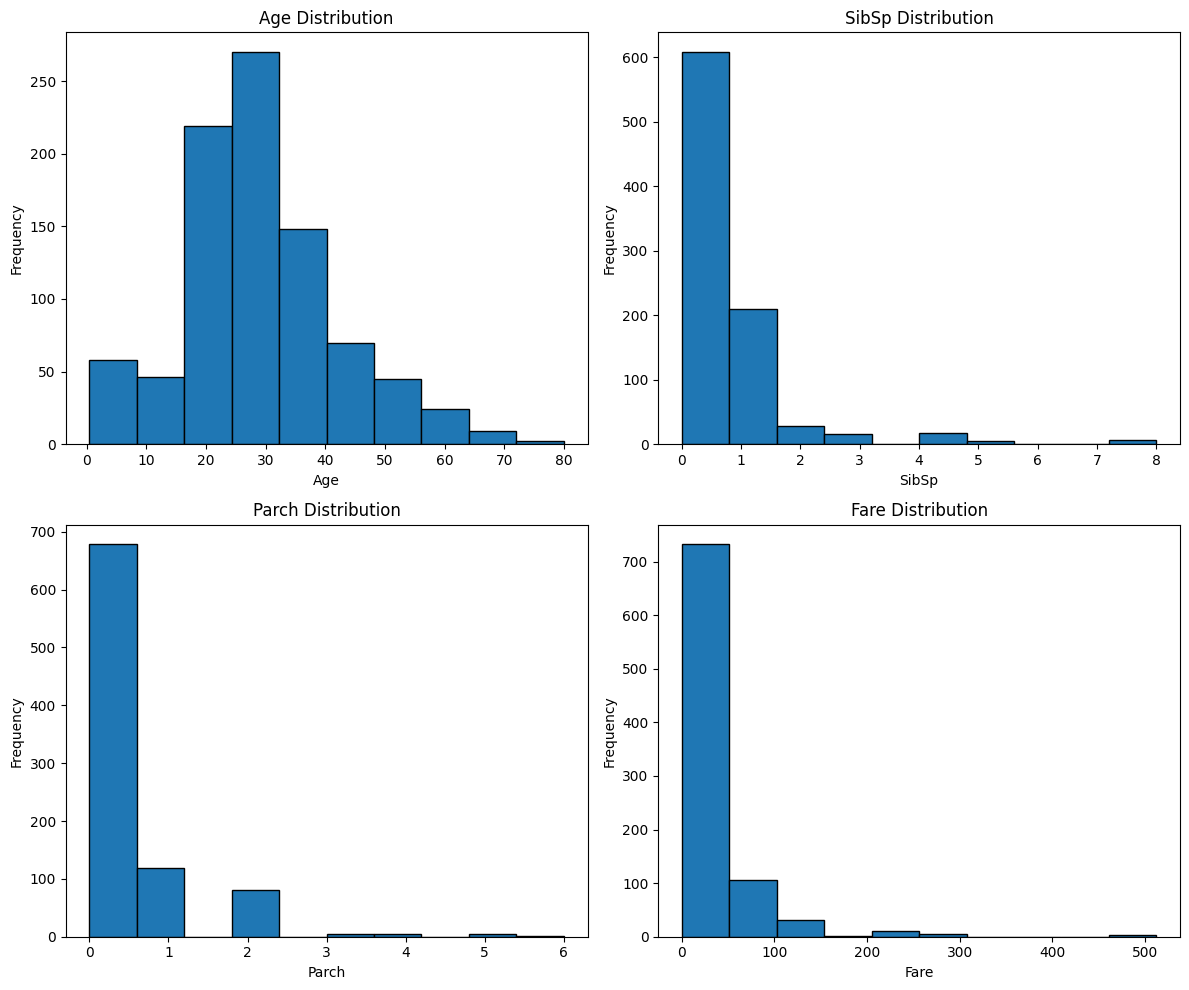

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(train_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(train_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(train_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(train_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

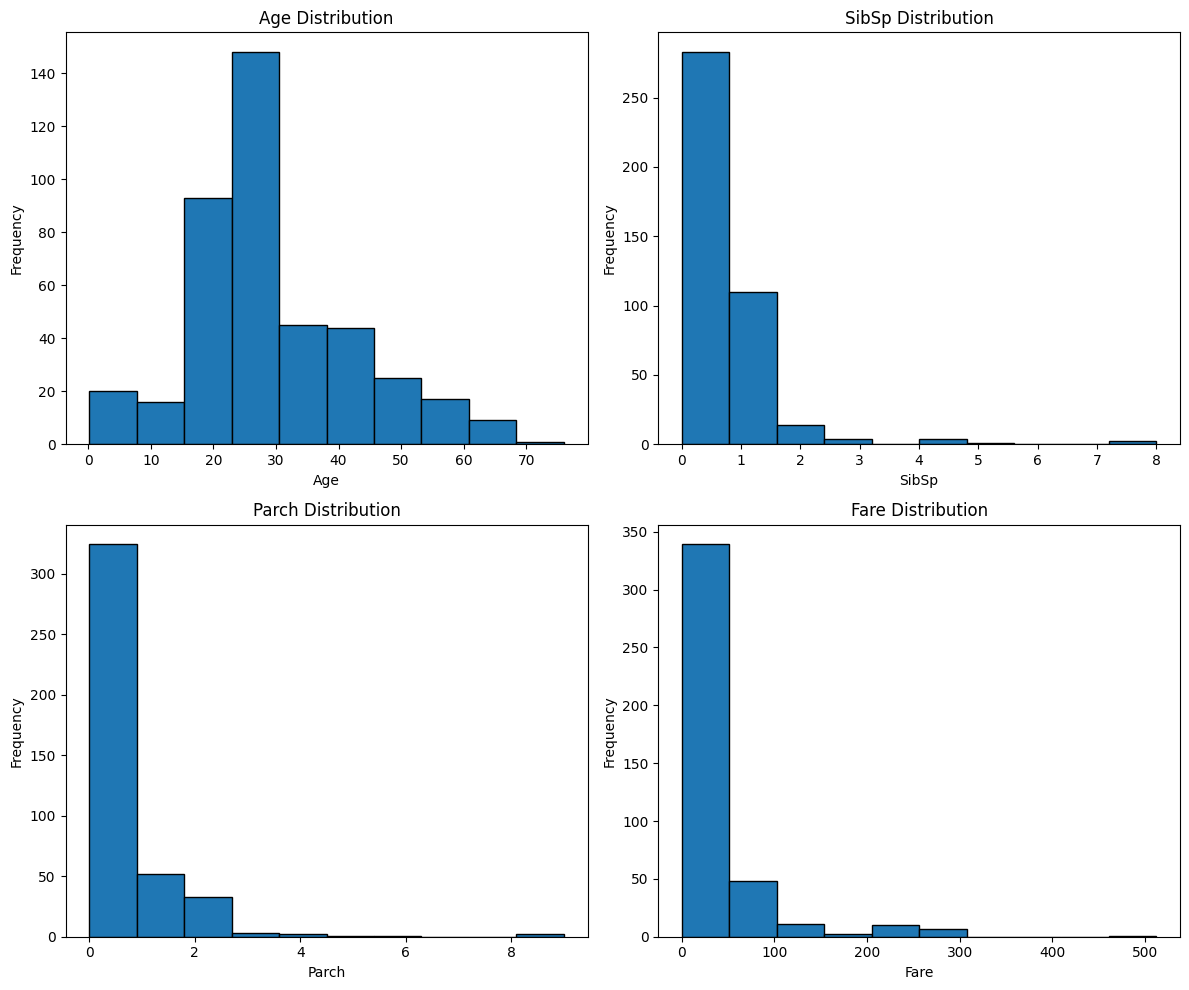

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(test_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(test_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(test_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(test_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np

# 로그 변환 함수 정의
def log_transform(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p(x)는 np.log(x+1)과 동일
    return df

# 로그 변환할 컬럼 목록
columns_to_transform = ['SibSp', 'Parch', 'Fare']

# train_df와 test_df에 로그 변환 적용
train_df = log_transform(train_df, columns_to_transform)
test_df = log_transform(test_df, columns_to_transform)


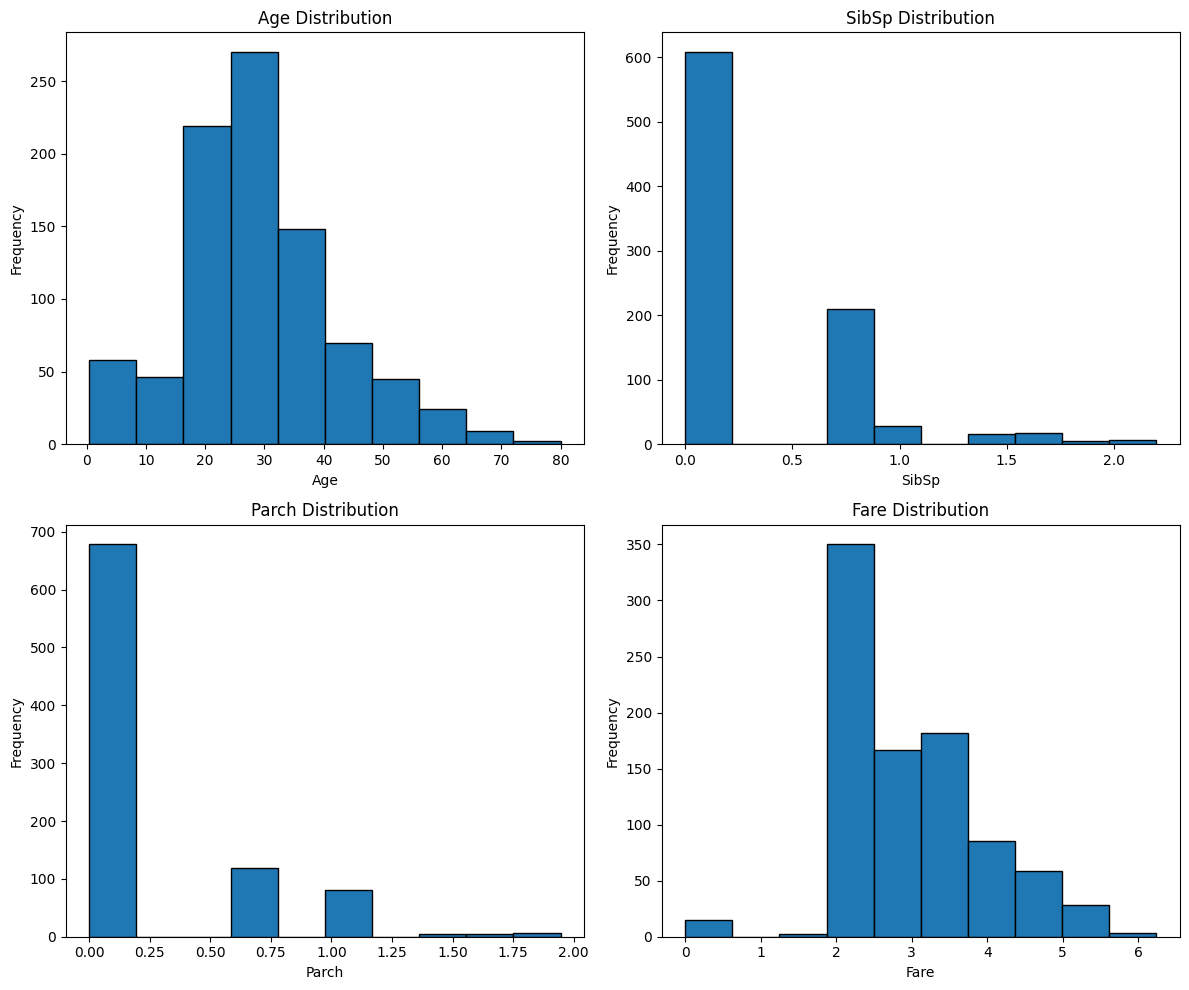

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(train_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(train_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(train_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(train_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

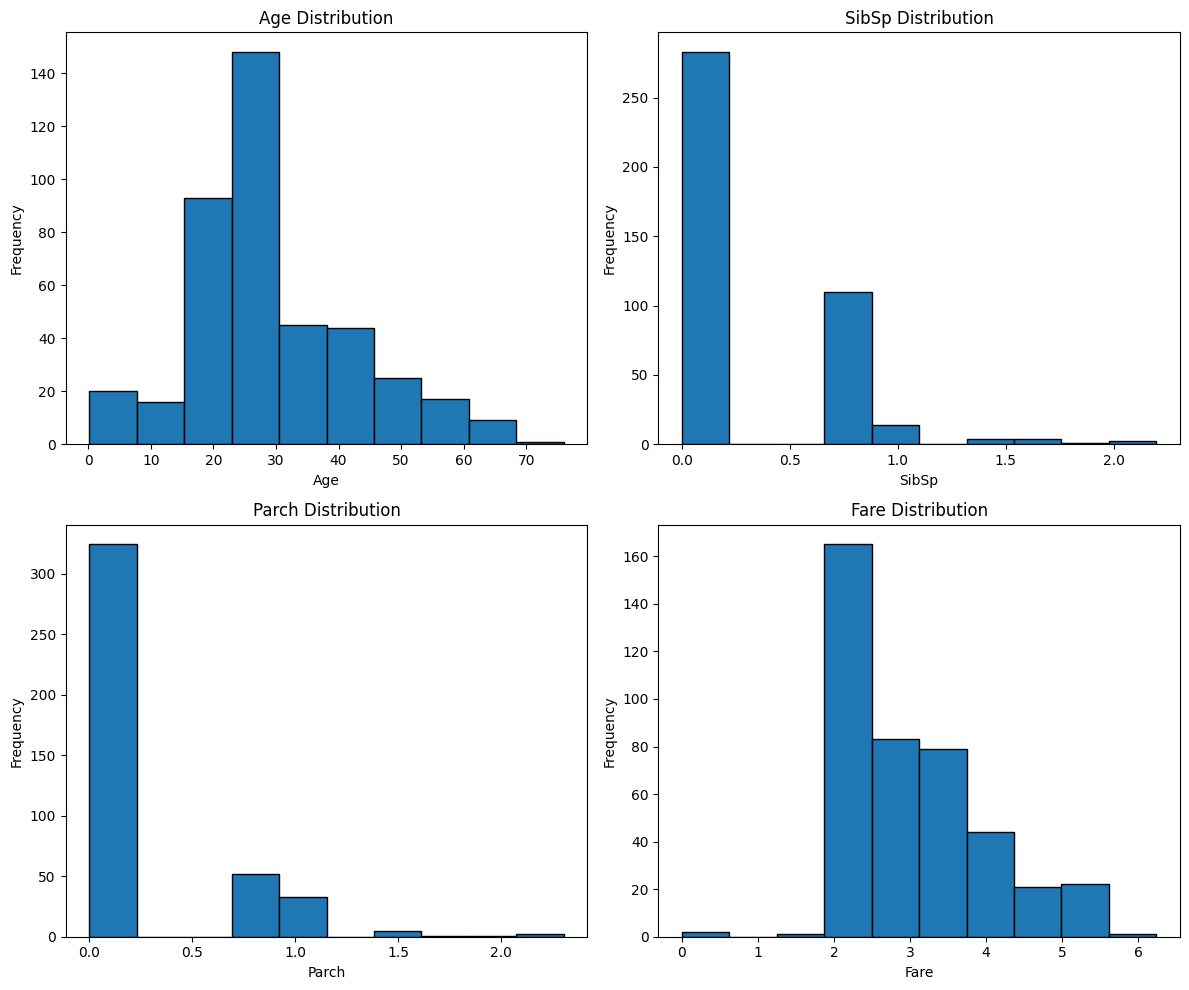

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 히스토그램 그리기
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Age 히스토그램
axes[0, 0].hist(test_df['Age'], bins=10, edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# SibSp 히스토그램
axes[0, 1].hist(test_df['SibSp'], bins=10, edgecolor='black')
axes[0, 1].set_title('SibSp Distribution')
axes[0, 1].set_xlabel('SibSp')
axes[0, 1].set_ylabel('Frequency')

# Parch 히스토그램
axes[1, 0].hist(test_df['Parch'], bins=10, edgecolor='black')
axes[1, 0].set_title('Parch Distribution')
axes[1, 0].set_xlabel('Parch')
axes[1, 0].set_ylabel('Frequency')

# Fare 히스토그램
axes[1, 1].hist(test_df['Fare'], bins=10, edgecolor='black')
axes[1, 1].set_title('Fare Distribution')
axes[1, 1].set_xlabel('Fare')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

### 범주형 데이터의 전처리

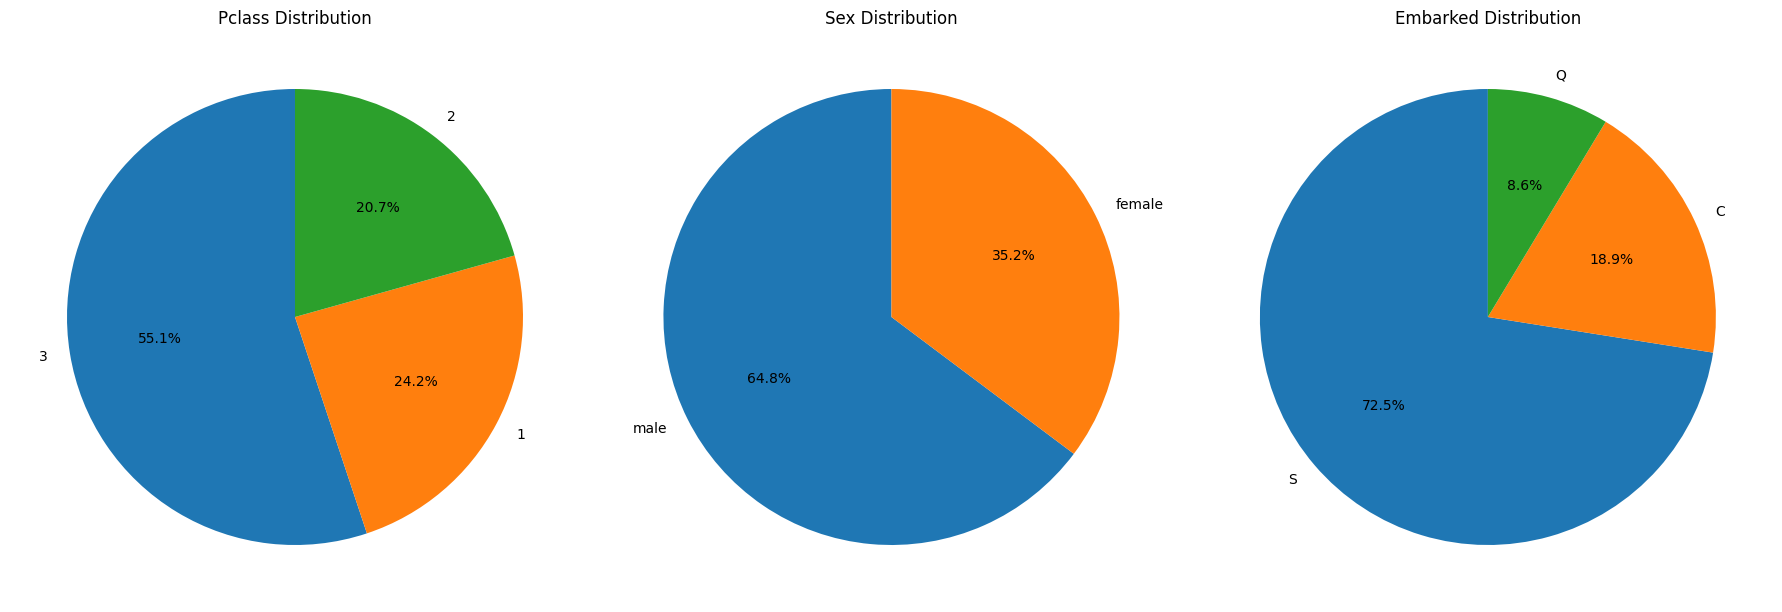

In [ ]:
# 파이 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pclass 파이 차트
pclass_counts = train_df['Pclass'].value_counts()
axes[0].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pclass Distribution')

# Sex 파이 차트
sex_counts = train_df['Sex'].value_counts()
axes[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sex Distribution')

# Embarked 파이 차트
embarked_counts = train_df['Embarked'].value_counts()
axes[2].pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Embarked Distribution')

plt.tight_layout()
plt.show()

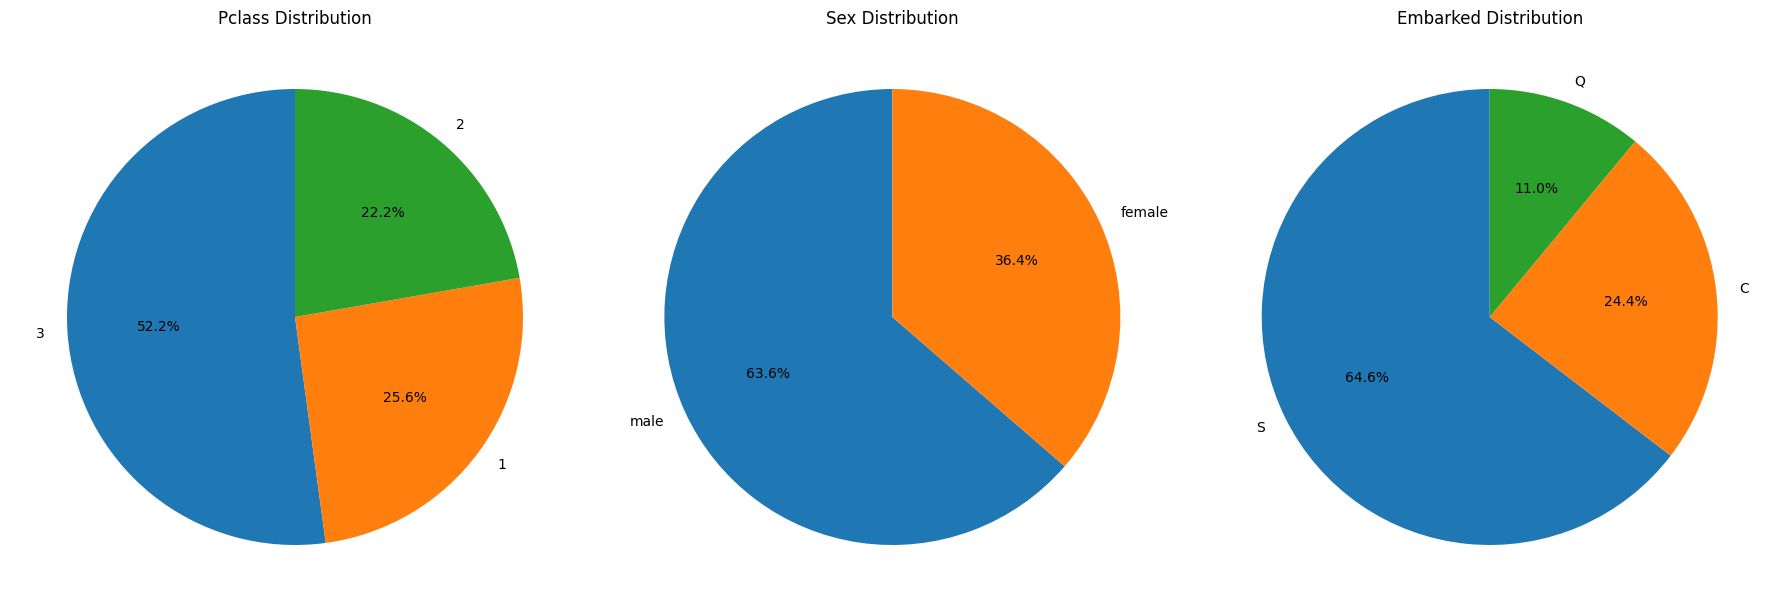

In [ ]:
# 파이 차트 그리기
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Pclass 파이 차트
pclass_counts = test_df['Pclass'].value_counts()
axes[0].pie(pclass_counts, labels=pclass_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pclass Distribution')

# Sex 파이 차트
sex_counts = test_df['Sex'].value_counts()
axes[1].pie(sex_counts, labels=sex_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sex Distribution')

# Embarked 파이 차트
embarked_counts = test_df['Embarked'].value_counts()
axes[2].pie(embarked_counts, labels=embarked_counts.index, autopct='%1.1f%%', startangle=90)
axes[2].set_title('Embarked Distribution')

plt.tight_layout()
plt.show()

### 최종 전처리

In [ ]:
train_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [ ]:
# Pclass, Sex, Embarked 컬럼을 원-핫 인코딩하여 정수형으로 변환
def one_hot_encode(df, columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column, dtype = int)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)
    return df

# 인코딩할 컬럼 목록
columns_to_encode = ['Pclass', 'Sex', 'Embarked']

# train_df와 test_df에 원-핫 인코딩 적용
train_df_encoded = one_hot_encode(train_df, columns_to_encode)
test_df_encoded = one_hot_encode(test_df, columns_to_encode)

## 모델 학습 및 평가

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 목록
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbosity=-1)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    report = classification_report(y_valid, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.7988826815642458
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

------------------------------------------------------------
Model: KNN
Accuracy: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

------------------------------------------------------------
Model: SVM
Accuracy: 0.6145251396648045
Classification Report:
              preci

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C'])
# 차원의 저주를 의식해 embarked 변수를 제외함.
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 목록
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbosity=-1)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    report = classification_report(y_valid, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       105
           1       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

------------------------------------------------------------
Model: KNN
Accuracy: 0.7932960893854749
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       105
           1       0.77      0.72      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

------------------------------------------------------------
Model: SVM
Accuracy: 0.6089385474860335
Classification Report:
              preci

### Logistic Regression

In [ ]:
import statsmodels.api as sm

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Sex_female', 'Pclass_3'])
# 다중공선성때문에 원핫인코딩 된 변수의 개수 -1개만 남겨주어야한다. ex)남자 1이 정해지면 여자는 자연히 0이므로 하나만 표기
y = train_df_encoded['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습 및 결과 요약
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Statsmodels를 사용하여 요약 결과 출력
X_train_sm = sm.add_constant(X_train)  # 절편 추가
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

print(result.summary())

# 예측 및 평가
y_pred = log_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Optimization terminated successfully.
         Current function value: 0.450323
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      704
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 Jul 2024   Pseudo R-squ.:                  0.3200
Time:                        13:09:43   Log-Likelihood:                -320.63
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 2.469e-61
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6517      0.514      1.268      0.205      -0.356       1.659
Age           -0.0339      0.

In [ ]:
import statsmodels.api as sm

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Sex_female', 'Pclass_3', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습 및 결과 요약
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Statsmodels를 사용하여 요약 결과 출력
X_train_sm = sm.add_constant(X_train)  # 절편 추가
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

print(result.summary())

# 예측 및 평가
y_pred = log_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Optimization terminated successfully.
         Current function value: 0.451193
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      705
Method:                           MLE   Df Model:                            6
Date:                Mon, 22 Jul 2024   Pseudo R-squ.:                  0.3187
Time:                        13:11:12   Log-Likelihood:                -321.25
converged:                       True   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 6.134e-62
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7096      0.501      1.415      0.157      -0.273       1.692
Age           -0.0326      0.

### KNN

**Cross-Validation**

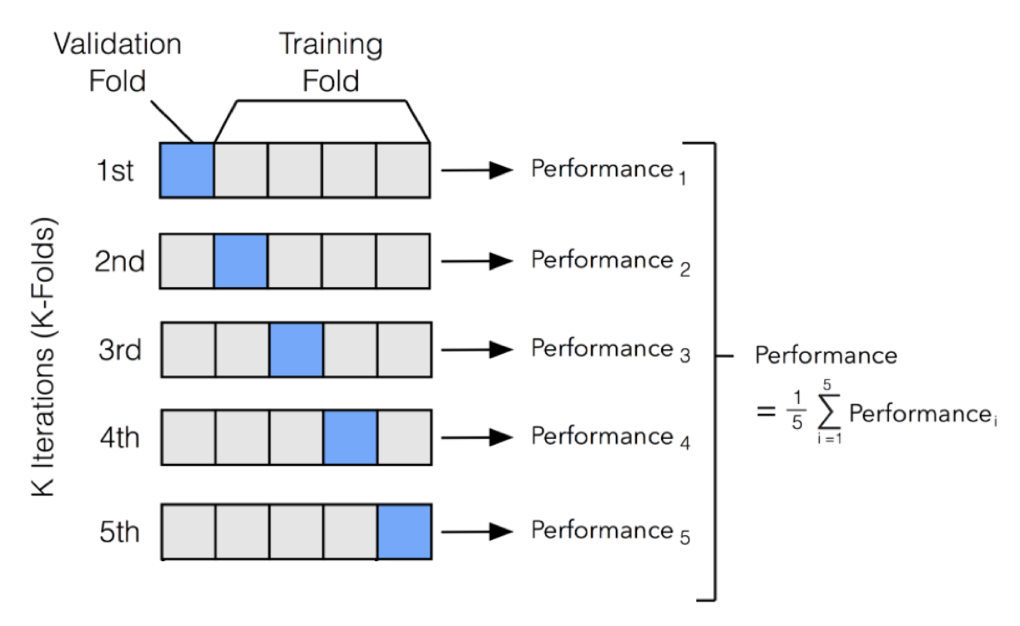

In [ ]:
from sklearn.model_selection import GridSearchCV

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11], #홀수로설정해주는디테일
    'metric': ['euclidean', 'manhattan']
}

# KNN 모델 설정
knn = KNeighborsClassifier()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"KNN Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3}
KNN Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       105
           1       0.77      0.77      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



### SVM

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel': ['rbf']
}

# SVM 모델 설정
svm = SVC()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"SVM Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



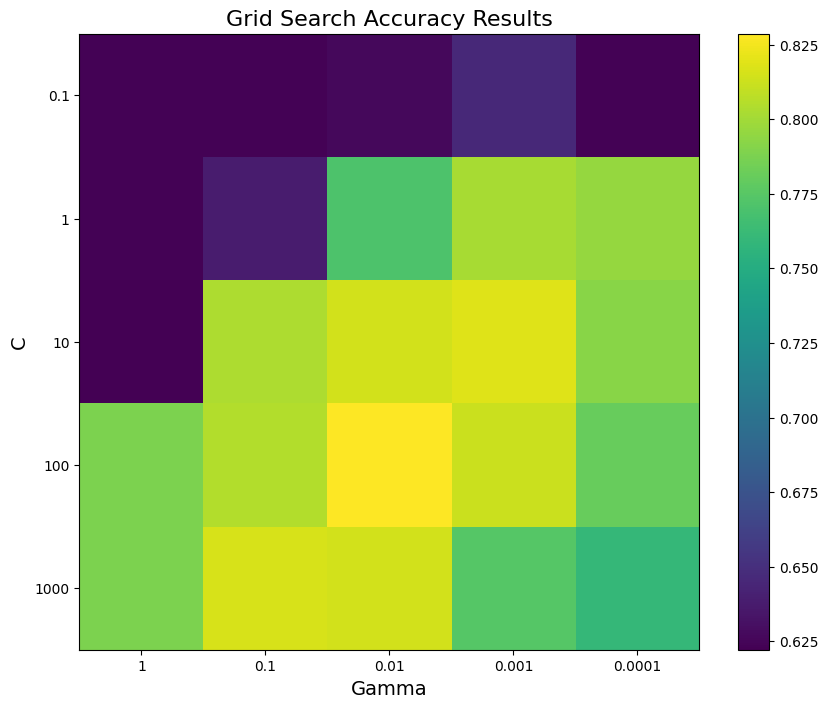

In [ ]:
# GridSearchCV 결과에서 각 하이퍼파라미터 조합에 대한 정확도 추출
results = pd.DataFrame(grid_search.cv_results_)

# 결과 시각화
pivot_table = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')

plt.figure(figsize=(10, 8))
plt.title("Grid Search Accuracy Results", fontsize=16)
plt.xlabel("Gamma", fontsize=14)
plt.ylabel("C", fontsize=14)
plt.imshow(pivot_table, interpolation="nearest", cmap="viridis", aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'])
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()

### Decision Tree

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Decision Tree 모델 설정
dt = DecisionTreeClassifier()

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)

# 모델 학습
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Best Hyperparameters: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



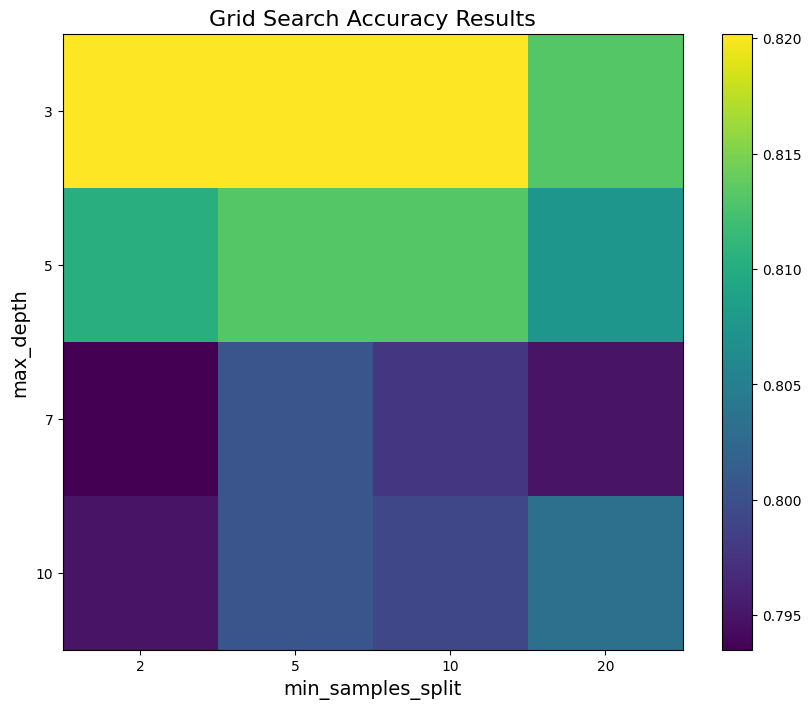

In [ ]:
# GridSearchCV 결과에서 각 하이퍼파라미터 조합에 대한 정확도 추출
results = pd.DataFrame(grid_search.cv_results_)

# 결과 시각화
pivot_table = results.pivot(index='param_max_depth', columns='param_min_samples_split', values='mean_test_score')

plt.figure(figsize=(10, 8))
plt.title("Grid Search Accuracy Results", fontsize=16)
plt.xlabel("min_samples_split", fontsize=14)
plt.ylabel("max_depth", fontsize=14)
plt.imshow(pivot_table, interpolation="nearest", cmap="viridis", aspect='auto')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['min_samples_split'])), param_grid['min_samples_split'])
plt.yticks(np.arange(len(param_grid['max_depth'])), param_grid['max_depth'])
plt.show()

Decision Tree Accuracy: 0.8100558659217877
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       105
           1       0.80      0.72      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



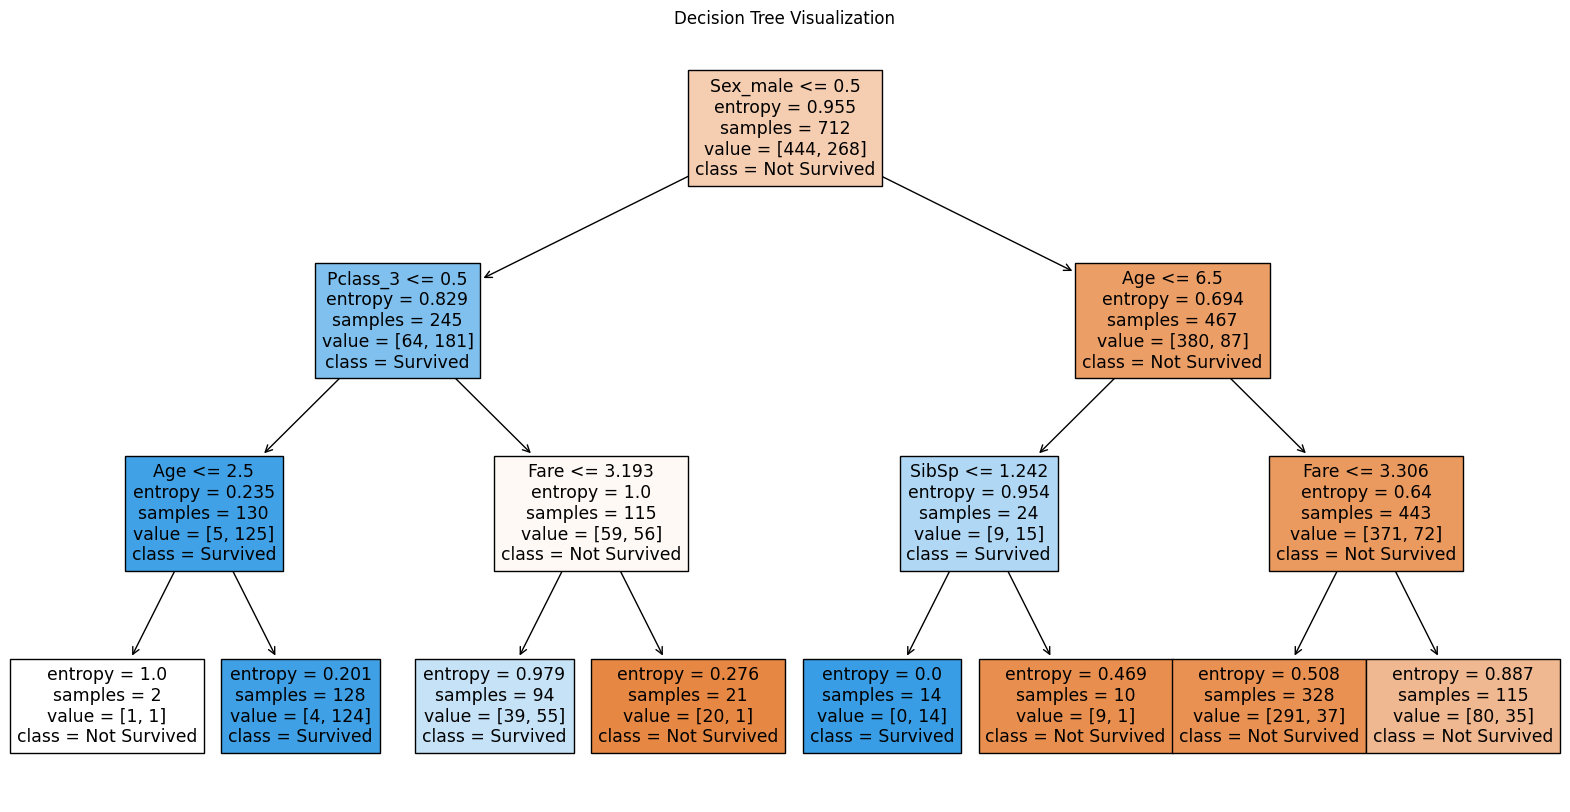

In [ ]:
from sklearn.tree import plot_tree

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree 모델 설정 및 학습
dt = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=2)
dt.fit(X_train, y_train)

# 예측 및 평가
y_pred = dt.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Decision Tree Accuracy: {accuracy}")
print("Classification Report:")
print(report)

# 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Not Survived', 'Survived'])
plt.title("Decision Tree Visualization")
plt.show()

### Random Forest

In [ ]:
from tqdm import tqdm
from sklearn.model_selection import ParameterGrid

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20]
}

# Random Forest 모델 설정
rf = RandomForestClassifier()

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV (앞서 그리드서치라이브러리를 적용하면 시간이 오래걸림...)
best_score = 0
best_params = None
for params in grid:
    rf.set_params(**params)
    rf.fit(X_train, y_train)
    score = rf.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Random Forest Accuracy: {accuracy}")
print("Classification Report:")
print(report)


100%|██████████| 48/48 [00:20<00:00,  2.31it/s]


Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Random Forest Accuracy: 0.8156424581005587
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



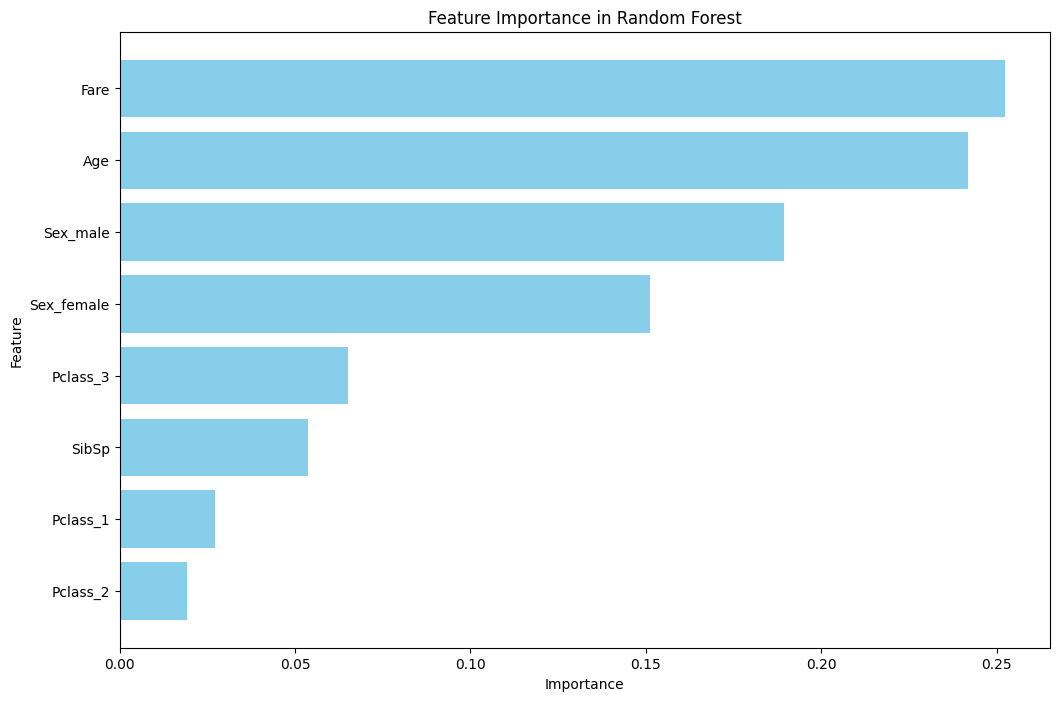

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest 모델 설정 및 학습
rf = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)
rf.fit(X_train, y_train)

# 특성 중요도 추출
feature_importances = rf.feature_importances_
features = X.columns

# 특성 중요도를 데이터프레임으로 정렬
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # 특성 중요도가 높은 순으로 정렬되도록 y축 반전
plt.show()

#결과: FARE와 AGE를 먼저 고려할 경우, Pclass의 중요도가 낮아지는 경향이 있다.

### Gradient Boosting

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2] #오답에 대한 가중치
}

# Gradient Boosting 모델 설정
gb = GradientBoostingClassifier()

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    gb.set_params(**params)
    gb.fit(X_train, y_train)
    score = gb.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = GradientBoostingClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy}")
print("Classification Report:")
print(report)

100%|██████████| 27/27 [00:27<00:00,  1.03s/it]


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting Accuracy: 0.8547486033519553
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       105
           1       0.85      0.78      0.82        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.85       179
weighted avg       0.85      0.85      0.85       179



### XGBoost

In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

# XGBoost 모델 설정
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid))

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    xgb.set_params(**params)
    xgb.fit(X_train, y_train)
    score = xgb.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = XGBClassifier(**best_params, use_label_encoder=False, eval_metric='logloss')
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"XGBoost Accuracy: {accuracy}")
print("Classification Report:")
print(report)

100%|██████████| 27/27 [00:03<00:00,  8.48it/s]


Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
XGBoost Accuracy: 0.8491620111731844
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87       105
           1       0.84      0.78      0.81        74

    accuracy                           0.85       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179



### LightGBM

In [ ]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리 (정규화)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch']))

# train/validation set 분할
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, train_df_encoded['Survived'], test_size=0.2, random_state=42)

# 하이퍼파라미터 튜닝을 위한 파라미터 그리드 설정
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [7, 15, 31],
    'min_child_samples': [5, 10, 20]
}

# LightGBM 모델 설정
lgbm = LGBMClassifier(verbosity=-1)

# 진행율 표시를 위해 ParameterGrid 생성
grid = list(ParameterGrid(param_grid))

# tqdm 설정
progress_bar = tqdm(total=len(grid), desc="Hyperparameter tuning")

# 사용자 정의 GridSearchCV
best_score = 0
best_params = None
for params in grid:
    lgbm.set_params(**params)
    lgbm.fit(X_train, y_train)
    score = lgbm.score(X_valid, y_valid)
    if score > best_score:
        best_score = score
        best_params = params
    progress_bar.update(1)

progress_bar.close()

# 최적의 하이퍼파라미터 출력
print(f"Best Hyperparameters: {best_params}")

# 최적의 모델로 예측 수행
best_model = LGBMClassifier(**best_params, verbosity=-1)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_valid)

# 모델 평가
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)
print(f"LightGBM Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Hyperparameter tuning: 100%|██████████| 243/243 [00:12<00:00, 19.51it/s]

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_samples': 20, 'n_estimators': 200, 'num_leaves': 31}
LightGBM Accuracy: 0.8659217877094972
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       105
           1       0.84      0.84      0.84        74

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179



## 모델 선택 및 제출

In [ ]:
train_df_final = train_df_encoded.drop(['Sex_female', 'Embarked_S', 'Embarked_C', 'Embarked_Q', 'Pclass_3', 'Parch'], axis = 1)

In [ ]:
train_df_final

,PassengerId,Survived,Age,SibSp,Fare,Pclass_1,Pclass_2,Sex_male
0,1,0,22.0,0.693147,2.110213,0,0,1
1,2,1,38.0,0.693147,4.280593,1,0,0
2,3,1,26.0,0.000000,2.188856,0,0,0
3,4,1,35.0,0.693147,3.990834,1,0,0
4,5,0,35.0,0.000000,2.202765,0,0,1
...,...,...,...,...,...,...,...,...
886,887,0,27.0,0.000000,2.639057,0,1,1
887,888,1,19.0,0.000000,3.433987,1,0,0
888,889,0,21.5,0.693147,3.196630,0,0,0
889,890,1,26.0,0.000000,3.433987,1,0,1


In [ ]:
submission_df = test_df_encoded.drop(columns=['Embarked_S', 'Embarked_Q', 'Embarked_C', 'Parch', 'Sex_female', 'Pclass_3'])

In [ ]:
submission_df

,PassengerId,Age,SibSp,Fare,Pclass_1,Pclass_2,Sex_male
0,892,34.5,0.000000,2.178064,0,0,1
1,893,47.0,0.693147,2.079442,0,0,0
2,894,62.0,0.000000,2.369075,0,1,1
3,895,27.0,0.000000,2.268252,0,0,1
4,896,22.0,0.693147,2.586824,0,0,0
...,...,...,...,...,...,...,...
413,1305,25.0,0.000000,2.202765,0,0,1
414,1306,39.0,0.000000,4.699571,1,0,0
415,1307,38.5,0.000000,2.110213,0,0,1
416,1308,25.0,0.000000,2.202765,0,0,1


In [ ]:
from sklearn.ensemble import VotingClassifier

# Feature와 Target 분리
X = train_df_final.drop(columns=['PassengerId', 'Survived'])
y = train_df_final['Survived']

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X)
submission_scaled = scaler.transform(submission_df.drop(columns=['PassengerId']))

# 개별 모델 설정
models = [
    ('lr', LogisticRegression(max_iter=200)),
    ('knn', KNeighborsClassifier(metric='manhattan', n_neighbors=3)),
    ('svm', SVC(C=100, gamma=0.01, kernel='rbf')),
    ('dt', DecisionTreeClassifier(max_depth=3, min_samples_split=2)),
    ('rf', RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)),
    ('gb', GradientBoostingClassifier(learning_rate=0.1, max_depth=3, n_estimators=200)),
    ('xgb', XGBClassifier(learning_rate=0.01, max_depth=7, n_estimators=200, use_label_encoder=False, eval_metric='logloss')),
    ('lgbm', LGBMClassifier(verbosity = -1, learning_rate=0.1, max_depth=5, min_child_samples=20, n_estimators=200, num_leaves=31))
]

# Voting Classifier 설정
voting_clf = VotingClassifier(estimators=models, voting='hard')
voting_clf.fit(X_train_scaled, y)

# 최적의 모델로 submission_df 예측 수행
submission_predictions = voting_clf.predict(submission_scaled)

# 결과 데이터프레임 생성
submission_result = pd.DataFrame({
    'PassengerId': submission_df['PassengerId'],
    'Survived': submission_predictions
})

In [ ]:
submission_result.to_csv("submission_result.csv", index = False)

In [ ]:
!kaggle competitions submit -c titanic -f submission_result.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 3.99kB/s]
400 - Bad Request - Submission not allowed:  Your team has used its daily Submission allowance (10) today, please try again tomorrow UTC (11 hours from now).


# **과제**

실습 코드 및 수업에서 배운 내용을 참조하여, 정확도 **77.272%를 초과**하는 모델을 만들고 제출하세요. Kaggle 결과 화면을 캡쳐하고 이곳에 업로드 해주세요.

아래는 해볼만한 실험 과정 예시입니다.
1. 전처리 과정
  *   Age의 전처리를 조금 더 엄밀히 할 수 있다.
  *   수치형 데이터의 경우 Outlier를 탐지해서 이산화하거나 학습에서 제거할 수 있다.
  *   범주형 데이터의 경우 Embarked를 학습에 이용해볼 수도 있다.
  *   Feature Engineering 과정을 통해서 학습에 유의한 새로운 변수를 생성할 수도 있다.
2. 모델 학습 및 평가 과정
  *  각 모델에 대해 Hyperparameter Tuning 과정을 좀 더 엄밀하게 할 수 있다.
  *  각 모델에 대해 고려하는 Hyperparameter를 더 다양하게 해볼 수 있다.
3. 모델 선택 과정
  * Voting Classifier를 사용하지 않고 가장 좋았던 모델 하나만으로 해볼 수 있다.
  * 모델 선정을 여러가지 모델을 개별적으로 테스트 해볼 수 있다.

그 외에도 많은 방법론이 있을 수 있습니다. 직접 이것저것 해보면서 Kaggle에 제출하고, 머신러닝 모델 학습 경험을 가져보기 바랍니다.


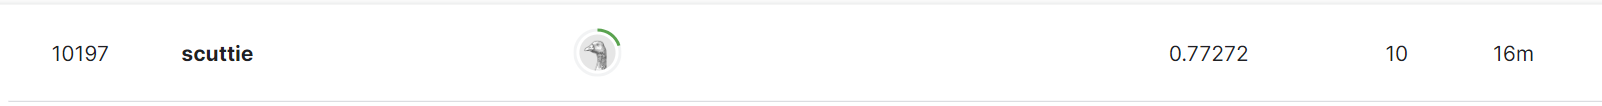

**평가 기준**
1. Kaggle 제출 화면을 캡쳐해서 해당 코드에 첨부했는가? (올리면 20점, 아니면 0점)
2. Kaggle 제출 정확도가 77.272% 초과인가? (초과했으면 20점, 아니면 0점)
3. 전처리/학습&평가/모델 선정 과정에 대한 설명이 나름의 근거가 있으면서 흐름이 논리적인가? (각 20점 만점으로 정성 평가. 60점 만점.)

**보너스 점수**
1. 데이터반 Kaggle 제출 정확도 상위 Percentile에 따라 추가 점수 부여
  * 95th Percentile: 20점
  * 90th Percentile: 15점
  * 85th Percentile: 10점
  * 80th Percentile: 5점
  * 단, Cheating이 확인되었을 시 해당 실습은 예외 없이 0점 처리.

**Cheating의 기준**
* Test Set에 대해서 생존 여부를 검색해서 채워넣었음.
* 정답지를 다른 소스에서 미리 확인하고 생존 여부 정답지로 채워넣었음.
* 그 외 Test Set과 Survived 여부에 대한 사전 정보를 데이터에 주입했다면 Cheating

**Cheating이 아닌 기준**
* Test Set은 전처리 이외에는 관여되면 안된다.
* Train Set과 Test Set에는 같은 전처리 과정이 적용되어야 한다.
* 머신러닝 모델을 사용하여 학습 및 평가 과정이 있어야 한다.

In [ ]:
# Kaggle API를 사용하여 데이터 다운로드
!pip install kaggle

# Kaggle API 인증 파일 업로드
from google.colab import files
files.upload()

# Kaggle API 인증
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
# 타이타닉 데이터셋 다운로드
!kaggle competitions download -c titanic

# 압축 해제
!unzip titanic.zip

import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 31.9MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
100% 3.18k/3.18k [00:00<00:00, 3.89kB/s]
400 - Bad Request - Submission not allowed:  Your team has used its daily Submission allowance (10) today, please try again tomorrow UTC (7 minutes from now).


In [ ]:
import numpy as np

# 로그 변환 함수 정의
def log_transform(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p(x)는 np.log(x+1)과 동일
    return df

# 로그 변환할 컬럼 목록
columns_to_transform = ['Fare']

# train_df와 test_df에 로그 변환 적용
train_df = log_transform(train_df, columns_to_transform)
test_df = log_transform(test_df, columns_to_transform)


# 'SibSp' 3보다 크면 3으로 두도록 변환
train_df['SibSp'] = train_df['SibSp'].apply(lambda x: 3 if x > 3 else x)
test_df['SibSp'] = test_df['SibSp'].apply(lambda x: 3 if x > 3 else x)

# 결측치 드랍
train_df = train_df.dropna()

In [ ]:
train_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)
test_df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

# Pclass, Sex, Embarked 컬럼을 원-핫 인코딩하여 정수형으로 변환
def one_hot_encode(df, columns):
    for column in columns:
        one_hot = pd.get_dummies(df[column], prefix=column, dtype = int)
        df = df.drop(column, axis=1)
        df = df.join(one_hot)
    return df

# 인코딩할 컬럼 목록
columns_to_encode = ['Pclass', 'Sex', 'Embarked']

# train_df와 test_df에 원-핫 인코딩 적용
train_df_encoded = one_hot_encode(train_df, columns_to_encode)
test_df_encoded = one_hot_encode(test_df, columns_to_encode)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
train_df_encoded.drop('Cabin', axis = 1, inplace = True)
test_df_encoded.drop('Cabin', axis = 1, inplace = True)
train_df_encoded.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
3,4,1,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
6,7,0,54.0,0,0,3.967694,1,0,0,0,1,0,0,1
10,11,1,4.0,1,1,2.873565,0,0,1,1,0,0,0,1
11,12,1,58.0,0,0,3.316003,1,0,0,1,0,0,0,1


In [ ]:
# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Parch'])
y = train_df_encoded['Survived']

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 목록
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(verbosity=-1)
}

# 모델 학습 및 평가
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred)
    report = classification_report(y_valid, y_pred)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Model: Logistic Regression
Accuracy: 0.7297297297297297
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.50      0.58        14
           1       0.74      0.87      0.80        23

    accuracy                           0.73        37
   macro avg       0.72      0.68      0.69        37
weighted avg       0.73      0.73      0.72        37

------------------------------------------------------------
Model: KNN
Accuracy: 0.7297297297297297
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.36      0.50        14
           1       0.71      0.96      0.81        23

    accuracy                           0.73        37
   macro avg       0.77      0.66      0.66        37
weighted avg       0.76      0.73      0.70        37

------------------------------------------------------------
Model: SVM
Accuracy: 0.6216216216216216
Classification Report:
              preci

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Random Forest
Accuracy: 0.7027027027027027
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.50      0.56        14
           1       0.73      0.83      0.78        23

    accuracy                           0.70        37
   macro avg       0.68      0.66      0.67        37
weighted avg       0.70      0.70      0.69        37

------------------------------------------------------------
Model: Gradient Boosting
Accuracy: 0.8378378378378378
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.84      0.91      0.87        23

    accuracy                           0.84        37
   macro avg       0.84      0.81      0.82        37
weighted avg       0.84      0.84      0.83        37

------------------------------------------------------------
Model: XGBoost
Accuracy: 0.7027027027027027
Classification Report:
       

In [ ]:
import statsmodels.api as sm

# train/validation set 분할
X = train_df_encoded.drop(columns=['Survived', 'PassengerId', 'Embarked_S', 'Embarked_Q', 'Embarked_C', 'Sex_female', 'Pclass_3'])
# 다중공선성때문에 원핫인코딩 된 변수의 개수 -1개만 남겨주어야한다. ex)남자 1이 정해지면 여자는 자연히 0이므로 하나만 표기
y = train_df_encoded['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습 및 결과 요약
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train, y_train)

# Statsmodels를 사용하여 요약 결과 출력
X_train_sm = sm.add_constant(X_train)  # 절편 추가
log_reg_sm = sm.Logit(y_train, X_train_sm)
result = log_reg_sm.fit()

print(result.summary())

# 예측 및 평가
y_pred = log_reg.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
report = classification_report(y_valid, y_pred)

print(f"Logistic Regression Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Optimization terminated successfully.
         Current function value: 0.427803
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  146
Model:                          Logit   Df Residuals:                      138
Method:                           MLE   Df Model:                            7
Date:                Mon, 22 Jul 2024   Pseudo R-squ.:                  0.3134
Time:                        14:07:58   Log-Likelihood:                -62.459
converged:                       True   LL-Null:                       -90.972
Covariance Type:            nonrobust   LLR p-value:                 5.908e-10
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0418      1.345      0.774      0.439      -1.595       3.679
Age           -0.0307      0.

In [ ]:
train_df_final = train_df_encoded.drop(['Sex_female', 'Embarked_Q', 'Pclass_3', 'Parch'], axis = 1)
train_df_final.head()

,PassengerId,Survived,Age,SibSp,Fare,Pclass_1,Pclass_2,Sex_male,Embarked_C,Embarked_S
1,2,1,38.0,1,4.280593,1,0,0,1,0
3,4,1,35.0,1,3.990834,1,0,0,0,1
6,7,0,54.0,0,3.967694,1,0,1,0,1
10,11,1,4.0,1,2.873565,0,0,0,0,1
11,12,1,58.0,0,3.316003,1,0,0,0,1


In [ ]:
# 타이타닉 데이터셋 다운로드
!kaggle competitions download -c titanic

# 압축 해제
!unzip titanic.zip

import pandas as pd
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline # Import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# 새로운 특징 'FamilySize' 생성
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# 이름에서 타이틀 추출
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 성 추출
train_data['LastName'] = train_data['Name'].apply(lambda x: x.split(',')[0])
test_data['LastName'] = test_data['Name'].apply(lambda x: x.split(',')[0])

# 'FamilyGroup' 생성
train_data['FamilyGroup'] = train_data['LastName'] + "_" + train_data['FamilySize'].astype(str)
test_data['FamilyGroup'] = test_data['LastName'] + "_" + test_data['FamilySize'].astype(str)

# 각 가족 그룹에 대한 가장 흔한 Cabin으로 결측치 대체
family_cabin_mapping = train_data.dropna(subset=['Cabin']).groupby('FamilyGroup')['Cabin'].agg(lambda x:x.value_counts().index[0])
train_data['Cabin'] = train_data.apply(lambda x: family_cabin_mapping.get(x['FamilyGroup'], x['Cabin']), axis=1)
test_data['Cabin'] = test_data.apply(lambda x: family_cabin_mapping.get(x['FamilyGroup'], x['Cabin']), axis=1)

# 특징 선택
numerical_features = ['Pclass']
categorical_features = ['Embarked', 'Title', 'FamilyGroup', 'Cabin']
X = train_data[numerical_features + categorical_features]
y = train_data['Survived']
X_test = test_data[numerical_features + categorical_features]

# 전처리
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

def log_transform(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p(x)는 np.log(x+1)과 동일
    return df

columns_to_transform = ['Fare']
train_data = log_transform(train_data, columns_to_transform)
test_data = log_transform(test_data, columns_to_transform)

# 결측치 처리 1
# 결측치 드랍
train_data = train_data.dropna()


# 범주형 데이터 전처리
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 숫자형과 범주형 데이터 전처리를 번들로 묶기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 모델 정의
model = RandomForestClassifier(n_estimators=200, random_state=0)

# 전처리 및 모델링 코드를 파이프라인에 번들로 묶기
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# 데이터셋을 훈련 세트와 검증 세트로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 훈련 데이터 전처리 및 모델 훈련
clf.fit(X_train, y_train)

# 검증 데이터 전처리 및 예측
preds = clf.predict(X_val)

# 모델 평가
score = accuracy_score(y_val, preds)
print('Accuracy:', score)

# 테스트 데이터 전처리 및 예측
test_preds = clf.predict(X_test)


Accuracy: 0.8156424581005587


In [ ]:
# 새로운 특징 'FamilySize' 생성
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

# 이름에서 타이틀 추출
train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test_data['Title'] = test_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# 성 추출
train_data['LastName'] = train_data['Name'].apply(lambda x: x.split(',')[0])
test_data['LastName'] = test_data['Name'].apply(lambda x: x.split(',')[0])

# 'FamilyGroup' 생성
train_data['FamilyGroup'] = train_data['LastName'] + "_" + train_data['FamilySize'].astype(str)
test_data['FamilyGroup'] = test_data['LastName'] + "_" + test_data['FamilySize'].astype(str)

# 각 가족 그룹에 대한 가장 흔한 Cabin으로 결측치 대체
family_cabin_mapping = train_data.dropna(subset=['Cabin']).groupby('FamilyGroup')['Cabin'].agg(lambda x:x.value_counts().index[0])
train_data['Cabin'] = train_data.apply(lambda x: family_cabin_mapping.get(x['FamilyGroup'], x['Cabin']), axis=1)
test_data['Cabin'] = test_data.apply(lambda x: family_cabin_mapping.get(x['FamilyGroup'], x['Cabin']), axis=1)

# 특징 선택
numerical_features = ['Pclass']
categorical_features = ['Embarked', 'Title', 'FamilyGroup', 'Cabin']
X = train_data[numerical_features + categorical_features]
y = train_data['Survived']
X_test = test_data[numerical_features + categorical_features]

# 전처리
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

def log_transform(df, columns):
    for column in columns:
        df[column] = np.log1p(df[column])  # np.log1p(x)는 np.log(x+1)과 동일
    return df

columns_to_transform = ['Fare']
train_data = log_transform(train_data, columns_to_transform)
test_data = log_transform(test_data, columns_to_transform)

# 결측치 처리 2
# Embarked가 결측값인 사람들의 Embarked를 'S'로 채우기
train_data.loc[train_data['Embarked'].isna(), 'Embarked'] = 'S'
# Embarked가 결측값인 사람들의 Fare를 7.5로 채우기
test_data.loc[test_data['Fare'].isna(), 'Fare'] = 7.5
# 'Master.'가 포함된 Name의 Age 중앙값 계산
master_median_age = train_data[train_data['Name'].str.contains('Master.', na=False)]['Age'].median()
# Age가 결측인 경우 'Master.'가 포함된 Name의 중앙값으로 대체
train_data.loc[train_data['Age'].isna() & train_data['Name'].str.contains('Master.', na=False), 'Age'] = master_median_age
test_data.loc[test_data['Age'].isna() & test_data['Name'].str.contains('Master.', na=False), 'Age'] = master_median_age
# Pclass와 Sex로 그룹화하여 Age의 중앙값 계산
median_ages = train_data.groupby(['Pclass', 'Sex'])['Age'].median().reset_index()
median_ages = median_ages.rename(columns={'Age': 'Median_Age'})
# Age가 결측인 경우를 찾아 Pclass와 Sex의 Median_Age로 채우기
def fill_age(row):
    if pd.isna(row['Age']):
        return median_ages[(median_ages['Pclass'] == row['Pclass']) & (median_ages['Sex'] == row['Sex'])]['Median_Age'].values[0]
    else:
        return row['Age']
train_data['Age'] = train_data.apply(fill_age, axis=1)
test_data['Age'] = test_data.apply(fill_age, axis=1)


# 범주형 데이터 전처리
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# 숫자형과 범주형 데이터 전처리를 번들로 묶기
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# 모델 정의
model = RandomForestClassifier(n_estimators=200, random_state=0)

# 전처리 및 모델링 코드를 파이프라인에 번들로 묶기
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)])

# 데이터셋을 훈련 세트와 검증 세트로 분리
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

# 훈련 데이터 전처리 및 모델 훈련
clf.fit(X_train, y_train)

# 검증 데이터 전처리 및 예측
preds = clf.predict(X_val)

# 모델 평가
score = accuracy_score(y_val, preds)
print('Accuracy:', score)

# 테스트 데이터 전처리 및 예측
test_preds = clf.predict(X_test)


<ipython-input-18-a105add1d19c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
<ipython-input-18-a105add1d19c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Title'] = train_data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
<ipython-input-18-a105add1d19c>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the

Accuracy: 0.8421052631578947


FamilySize라는 새로운 특징을 생성합니다. 이 특징은 SibSp(형제자매 및 배우자 수)와 Parch(부모 및 자녀 수)에 1(자신)을 더한 값입니다.


승객의 이름에서 타이틀(예: Mr., Mrs., Miss 등)을 추출합니다. 이는 이름에서 유용한 정보를 얻기 위함입니다.


이름에서 성을 추출합니다. 이는 같은 성을 가진 사람들을 그룹화하는 데 사용됩니다.

성과 가족 크기를 조합하여 FamilyGroup이라는 새로운 특징을 생성합니다. 이는 가족 단위의 그룹을 나타냅니다.


각 가족 그룹에 대해 가장 흔한 Cabin 값을 찾아 결측치를 대체합니다. 이는 가족 단위로 같은 Cabin을 사용하는 경우가 많기 때문에 사용됩니다.


모델에 사용할 특징들을 선택합니다. Pclass, Embarked, Title, FamilyGroup, Cabin을 사용합니다. (Embarked와 Cabin을 포함했습니다.)


X는 훈련 데이터의 특징, y는 훈련 데이터의 타겟(Survived), X_test는 테스트 데이터의 특징입니다.


Fare 컬럼에 로그 변환을 적용하여 분포를 정규화합니다. 이는 모델의 성능을 향상시킬 수 있습니다.


앞선 코드는 결측치를 모두 제외했었으나, 이번에는 결측값을 적절한 값으로 채웁니다. Embarked는 'S'로, Fare는 7.5로, Age는 'Master' 타이틀이 있는 경우 중앙값으로, 그렇지 않으면 Pclass와 Sex에 기반한 중앙값으로 채웁니다.


이번에는 원-핫 인코딩만 적용합니다. 앞서 결측치를 전부 drop했을 때에는 기타 범주형 데이터 Embarked의 결측치를 가장 빈번한 값으로 채우도록 코딩했으나, 이번에는 직접 S로 체우도록 지정했습니다.


숫자형과 범주형 데이터를 각각 전처리하여 하나의 전처리기로 결합합니다.


RandomForestClassifier 분류기를 정의하고, 전처리와 모델링을 하나의 파이프라인으로 결합합니다.


RandomForestClassifier는 분류 작업에 자주 사용되는 앙상블 학습 방법입니다. 다수의 결정 트리를 사용하여 예측을 수행하고, 각 트리의 예측 결과를 투표하여 최종 결과를 결정합니다.
파라미터는 n_estimators=200으로, 랜덤 포레스트에 사용할 결정 트리의 개수를 200으로 설정합니다. random_state=0은 모델의 결과 재현성을 보장하기 위해 난수 생성의 시드를 설정한 것입니다.


>Pipeline 클래스는 일련의 변환기(transformer)와 추정기(estimator)를 하나의 객체로 결합할 수 있는 유틸리티입니다. 이를 통해 전처리와 모델링을 하나의 연속된 작업으로 처리할 수 있습니다. 코드가 더 간결해지고, 파이프라인 전체를 하나의 객체처럼 다룰 수 있어 코드의 재사용성과 유지보수성이 높아집니다.
<br><br>steps 매개변수는 튜플의 리스트를 받습니다. 각 튜플은 파이프라인 단계의 이름과 해당 단계에서 사용할 객체를 포함합니다.
('preprocessor', preprocessor): 전처리기를 나타냅니다. 이 단계에서는 숫자형과 범주형 데이터를 각각의 전처리기를 통해 전처리합니다.
preprocessor는 ColumnTransformer 객체입니다. 이 객체는 각각의 열에 대해 지정된 전처리기를 적용합니다. 숫자형 데이터에는 SimpleImputer와 StandardScaler를, 범주형 데이터에는 SimpleImputer와 OneHotEncoder를 사용합니다.
('model', model): 모델 객체를 나타냅니다. 여기서는 RandomForestClassifier를 사용합니다.<br><br>
Pipeline 객체의 fit 메서드를 호출하면, 데이터가 먼저 preprocessor를 통해 전처리된 후 model에 전달됩니다. 즉, 전처리와 모델 훈련이 연속적으로 수행됩니다.
Pipeline 객체의 predict 메서드를 호출하면, 새로운 데이터가 먼저 전처리된 후 모델을 통해 예측됩니다.

데이터를 훈련 세트와 검증 세트로 분리한 후, 훈련 세트로 모델을 훈련시킵니다.

검증 세트로 모델을 평가하고, 테스트 데이터에 대한 예측을 수행합니다.

In [ ]:
  # 결과
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_preds
})

In [ ]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
submission.to_csv("submission.csv", index = False)

In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 3.32kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

train데이터로 예측했을때는 84%가 나오는데, 막상 제출하면 75$가 나오네요. 과적합일까요>??

In [ ]:
# 타이타닉 데이터셋 다운로드
!kaggle competitions download -c titanic

# 압축 해제
!unzip titanic.zip

import pandas as pd
train_df = pd.read_csv("train.csv")
serving_df = pd.read_csv("test.csv")

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
print("Group by Parch: \n",train_df['Age'].isna().groupby(train_df['Parch']).value_counts())
print("Group by Sex: \n",train_df['Age'].isna().groupby(train_df['Sex']).value_counts())
print("Group by SibSp: \n",train_df['Age'].isna().groupby(train_df['SibSp']).value_counts())
print("Group by Pclass: \n",train_df['Age'].isna().groupby(train_df['Pclass']).value_counts())
print("Group by Survived: \n",train_df['Age'].isna().groupby(train_df['Survived']).value_counts())

Group by Parch: 
 Parch  Age  
0      False    521
       True     157
1      False    110
       True       8
2      False     68
       True      12
3      False      5
4      False      4
5      False      5
6      False      1
Name: count, dtype: int64
Group by Sex: 
 Sex     Age  
female  False    261
        True      53
male    False    453
        True     124
Name: count, dtype: int64
Group by SibSp: 
 SibSp  Age  
0      False    471
       True     137
1      False    183
       True      26
2      False     25
       True       3
3      False     12
       True       4
4      False     18
5      False      5
8      True       7
Name: count, dtype: int64
Group by Pclass: 
 Pclass  Age  
1       False    186
        True      30
2       False    173
        True      11
3       False    355
        True     136
Name: count, dtype: int64
Group by Survived: 
 Survived  Age  
0         False    424
          True     125
1         False    290
          True      52
Name: count,

In [ ]:
# 결측치가 있는 행을 삭제하는 대신, 결측치에 일단 0 입력
# train_df['Age']=train_df['Age'].fillna(train_df['Age'].mode()[0])
train_df['Age']=train_df['Age'].fillna(0.0)
serving_df['Age']=serving_df['Age'].fillna(0.0)
train_df['Fare']=train_df['Fare'].fillna(train_df['Fare'].mode()[0])
# serving_df['Age']=serving_df['Age'].fillna(serving_df['Age'].mode()[0])
serving_df['Fare']=serving_df['Fare'].fillna(serving_df['Fare'].mode()[0])
train_df['Embarked']=train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])
serving_df['Embarked']=serving_df['Embarked'].fillna(serving_df['Embarked'].mode()[0])

print('Train Dataset:\n',train_df.isnull().sum())
print('\nServing Dataset:\n',serving_df.isnull().sum())

Train Dataset:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Serving Dataset:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [ ]:
# SibSp, Parch가 없으면 혼자 왔다고 설정한다.
def alone(train_df):
    train_df['Is_alone']=((train_df.SibSp + train_df.Parch) < 1).astype('int')
    return train_df

# family는 앞의 family size와 같은 방식이다.
def family(df):
    df['Family']=df.SibSp+df.Parch+1
    return df
train_df=family(train_df)
serving_df=family(serving_df)

# age 14 이하는 minor로 설정한다.
train_df['minor']=(train_df.Age<=14).astype('int')
serving_df['minor']=(serving_df.Age<=14).astype('int')

# Cabin이 결측가 아니면 1, 결측치면 0을 입력한다.
train_df['in_cabin']=(train_df.Cabin.isna()==False).astype('int')
serving_df['in_cabin']=(serving_df.Cabin.isna()==False).astype('int')
train_df=alone(train_df)
serving_df=alone(serving_df)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Family       891 non-null    int64  
 13  minor        891 non-null    int64  
 14  in_cabin     891 non-null    int64  
 15  Is_alone     891 non-null    int64  
dtypes: float64(2), int64(9), object(5)
memory usage: 111.5+ KB


In [ ]:
def encoder(df):
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtypes=='object':
            df[col]=labelencoder.fit_transform(df[col])
    return df

In [ ]:
df = train_df[['Age','SibSp', 'Parch', 'Fare', 'Sex','Pclass', 'Embarked', 'Is_alone','Family','minor','in_cabin','Survived']]
test=serving_df[['Age','SibSp', 'Parch', 'Fare', 'Sex','Pclass', 'Embarked', 'Is_alone','Family','minor','in_cabin']]
train_df.columns
df=encoder(df)
test=encoder(test)

<ipython-input-28-81cc765d0e16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=labelencoder.fit_transform(df[col])
<ipython-input-28-81cc765d0e16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col]=labelencoder.fit_transform(df[col])
<ipython-input-28-81cc765d0e16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [ ]:
import plotly.express as px

figure= px.imshow(df.corr(), text_auto=True, width=1200, height=1200)
figure.show()

SibSp와 Parch가 Age와 유의한 상관계수를 가진다.

In [ ]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [ ]:
X=df.drop(columns='Survived')
y=df[['Survived']]
y[['Survived']].value_counts()

Survived
0           549
1           342
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.75, random_state=42)
X.keys()

Index(['Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Pclass', 'Embarked',
       'Is_alone', 'Family', 'minor', 'in_cabin'],
      dtype='object')

불균형 분포에 관한 가중치 설정

In [ ]:
def calculate_class_weights(y):
    unique_classes, class_counts = np.unique(y, return_counts=True)
    total_samples = len(y)
    class_weights = {}

    for class_label, class_count in zip(unique_classes, class_counts):
        class_weight = total_samples / (2.0 * class_count)
        class_weights[class_label] = class_weight

    return class_weights

class_weights = calculate_class_weights(y_train)
print("Class weights:", class_weights)

Class weights: {0: 0.8048192771084337, 1: 1.3201581027667983}


In [ ]:
df

,Age,SibSp,Parch,Fare,Sex,Pclass,Embarked,Is_alone,Family,minor,in_cabin,Survived
0,22.0,1,0,7.2500,1,3,2,0,2,0,0,0
1,38.0,1,0,71.2833,0,1,0,0,2,0,1,1
2,26.0,0,0,7.9250,0,3,2,1,1,0,0,1
3,35.0,1,0,53.1000,0,1,2,0,2,0,1,1
4,35.0,0,0,8.0500,1,3,2,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,27.0,0,0,13.0000,1,2,2,1,1,0,0,0
887,19.0,0,0,30.0000,0,1,2,1,1,0,1,1
888,0.0,1,2,23.4500,0,3,2,0,4,1,0,0
889,26.0,0,0,30.0000,1,1,0,1,1,0,1,1


In [ ]:
!pip install scikit-learn
from sklearn.linear_model import LogisticRegression # Import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
!pip install xgboost
from xgboost import XGBClassifier
!pip install lightgbm
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split

<ipython-input-54-40437e0a1ede>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Age,Survived,SibSp,Parch,Fare,PassengerId,Pclass,embarked,Sex_female,Sex_male
0,22.0,0,1,0,7.2500,1,3,0.6,False,True
1,38.0,1,1,0,71.2833,2,1,0.2,True,False
2,26.0,1,0,0,7.9250,3,3,0.6,True,False
3,35.0,1,1,0,53.1000,4,1,0.6,True,False
4,35.0,0,0,0,8.0500,5,3,0.6,False,True


In [ ]:
# 타이타닉 데이터셋 다운로드
!kaggle competitions download -c titanic

# 압축 해제
!unzip titanic.zip

import pandas as pd
train_df = pd.read_csv("train.csv")
serving_df = pd.read_csv("test.csv")

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 35.9MB/s]
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df = train_df[['Age','Survived','SibSp', 'Parch', 'Fare','PassengerId', 'Sex','Pclass']]
df['embarked']=train_df['Embarked'].replace(['C', 'Q', 'S'],[0.2,0.4,0.6])
df=pd.get_dummies(df, columns=['Sex'])
df.head()

<ipython-input-3-40437e0a1ede>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['embarked']=train_df['Embarked'].replace(['C', 'Q', 'S'],[0.2,0.4,0.6])


,Age,Survived,SibSp,Parch,Fare,PassengerId,Pclass,embarked,Sex_female,Sex_male
0,22.0,0,1,0,7.2500,1,3,0.6,False,True
1,38.0,1,1,0,71.2833,2,1,0.2,True,False
2,26.0,1,0,0,7.9250,3,3,0.6,True,False
3,35.0,1,1,0,53.1000,4,1,0.6,True,False
4,35.0,0,0,0,8.0500,5,3,0.6,False,True


In [ ]:
def imputation(df):
    print('Before Imputations: ', df.isnull().sum())
    #df['Age'].fillna(df['Age'][df['Age'].isna()==False].mean(), inplace=True)
    df['Age'].fillna(0.0, inplace=True)

    print('After Imputations: ', df.isnull().sum())
    return df
df=imputation(df)
df['embarked'].fillna(df['embarked'].astype(float).median(), inplace=True)
print('After Imputations: ', df.isnull().sum())

Before Imputations:  Age            177
Survived         0
SibSp            0
Parch            0
Fare             0
PassengerId      0
Pclass           0
embarked         2
Sex_female       0
Sex_male         0
dtype: int64
After Imputations:  Age            0
Survived       0
SibSp          0
Parch          0
Fare           0
PassengerId    0
Pclass         0
embarked       2
Sex_female     0
Sex_male       0
dtype: int64
After Imputations:  Age            0
Survived       0
SibSp          0
Parch          0
Fare           0
PassengerId    0
Pclass         0
embarked       0
Sex_female     0
Sex_male       0
dtype: int64


<Axes: >

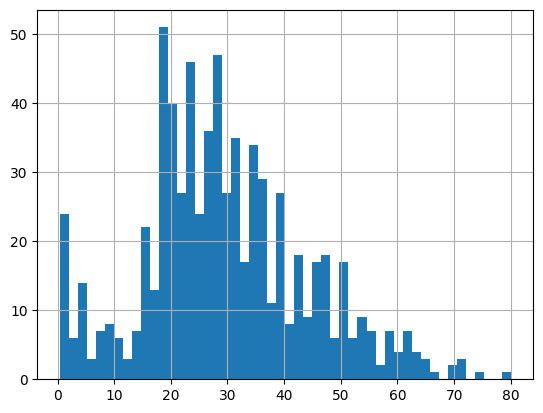

In [ ]:
train_df['Age'][train_df['Age'].isnull()==False].hist(bins=50)
#print('Upper Outliers:',df['Age'][df['Age']>80])
#print('Lower Outliers:',df['Age'][df['Age']<0])

In [ ]:
X=df[['Age','SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass','embarked']]
y=df[['Survived']]

In [ ]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.8, random_state=42)

In [ ]:
def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Precision Score : ", precision_score(y_test,y_pred)) #precision measures the proportion of true positive predictions among all positive instances. how many of survived predicted actually survived, doesn't verifies 0's 70 survived as preicted whereas actually 92 survived so 70/92 will be the precision.  if we predicted 70 survived, so presion will tell how many of those 70 predicted survived matches the actual row by row data. It checkes all positives and verifies if the answer is true for each row?
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    print("F1 Score: ",f1_score(y_test,y_pred)) #mean of recall and precision
    cm = confusion_matrix(y_test, y_pred)
    figure= px.imshow(cm,text_auto=True, width=1200, height=1200)
    figure.show()

In [ ]:
!pip install plotly
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.8, random_state=42)

def evaluate(y_test,ypred):
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix
    import plotly.express as px # Import the plotly.express library
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("Precision Score : ", precision_score(y_test,y_pred)) #precision measures the proportion of true positive predictions among all positive instances. how many of survived predicted actually survived, doesn't verifies 0's 70 survived as preicted whereas actually 92 survived so 70/92 will be the precision.  if we predicted 70 survived, so presion will tell how many of those 70 predicted survived matches the actual row by row data. It checkes all positives and verifies if the answer is true for each row?
    print("Recall Score: ", recall_score(y_test,y_pred, average='macro')) #Recall measures the proportion of true positive predictions among all actual positive instalnces. If we predicted 100 survived correctly whereas actually 100 survived out of which 67 predicted correctly so recall will be 0.67
    print("F1 Score: ",f1_score(y_test,y_pred)) #mean of recall and precision
    cm = confusion_matrix(y_test, y_pred)
    figure= px.imshow(cm,text_auto=True, width=1200, height=1200)
    figure.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
evaluate(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  0.8212290502793296
Precision Score :  0.7837837837837838
Recall Score:  0.8157014157014157
F1 Score:  0.7837837837837838


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier(n_jobs=-1,verbose=1)
print ('Training the model')
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
evaluate(y_test,y_pred)

Training the model


<ipython-input-12-fc3ac4772063>:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


Accuracy:  0.8212290502793296
Precision Score :  0.8
Recall Score:  0.8117117117117117
F1 Score:  0.7777777777777778


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)
print(nb.score(X_train,y_train))
y_pred=nb.predict(X_test)
evaluate(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.797752808988764
Accuracy:  0.7821229050279329
Precision Score :  0.7397260273972602
Recall Score:  0.7743886743886743
F1 Score:  0.7346938775510203


In [ ]:
from sklearn.svm import SVC
svm = SVC(verbose=1) # n_neighbors is the number of neighbors to consider when predicting a class label for
print ('Training the model')
svm.fit(X_test,y_test)
print(svm.score(X_train,y_train))
y_pred=svm.predict(X_test)
evaluate(y_test,y_pred)

Training the model
[LibSVM]0.8103932584269663
Accuracy:  0.8379888268156425
Precision Score :  0.8461538461538461
Recall Score:  0.824002574002574
F1 Score:  0.7913669064748202


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [ ]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',
              max_iter =1000,
              alpha=10,
              hidden_layer_sizes=10,
              random_state=5,
              activation='identity',
              batch_size=360,
              learning_rate='adaptive',
              verbose=0,
              early_stopping=0,
              n_iter_no_change=100)

print ('Training the model')
clf.fit(X_train,y_train)
print(clf.score(X_train,y_train))
y_pred=clf.predict(X_test)
evaluate(y_test,y_pred)

Training the model


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning:

Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



0.7991573033707865
Accuracy:  0.770949720670391
Precision Score :  0.7391304347826086
Recall Score:  0.7588803088803089
F1 Score:  0.7132867132867132


In [ ]:
df = serving_df[['Age','SibSp', 'Parch', 'Fare','PassengerId', 'Sex','Pclass']]
df['embarked']=serving_df['Embarked'].replace(['C', 'Q', 'S'],[0.2,0.4,0.6])
print('Before Processing: \n', df.isnull().sum())
df=pd.get_dummies(df, columns=['Sex'])
df = imputation(df)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
print('After Processing: \n', df.isnull().sum())

Before Processing: 
 Age            86
SibSp           0
Parch           0
Fare            1
PassengerId     0
Sex             0
Pclass          0
embarked        0
dtype: int64
Before Imputations:  Age            86
SibSp           0
Parch           0
Fare            1
PassengerId     0
Pclass          0
embarked        0
Sex_female      0
Sex_male        0
dtype: int64
After Imputations:  Age            0
SibSp          0
Parch          0
Fare           1
PassengerId    0
Pclass         0
embarked       0
Sex_female     0
Sex_male       0
dtype: int64
After Processing: 
 Age            0
SibSp          0
Parch          0
Fare           0
PassengerId    0
Pclass         0
embarked       0
Sex_female     0
Sex_male       0
dtype: int64


<ipython-input-16-87b2502aa4ea>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
X=df[['Age','SibSp', 'Parch','Fare','Sex_female', 'Sex_male','Pclass','embarked']]
result=pd.DataFrame(columns=['PassengerId', 'Survived','Probablity',])
result['PassengerId']=serving_df['PassengerId']
#result['Survived']=clf.predict(scale(X))

In [ ]:
result['Probablity']=(clf.predict_proba(scale(X))[:,1]+nb.predict_proba(scale(X))[:,1]+rf.predict_proba(scale(X))[:,1]+knn.predict_proba(scale(X))[:,1])/4
result['Survived']=(result['Probablity']>=0.66).astype('int')

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished


In [ ]:
submission= result[['PassengerId','Survived']]

In [ ]:
submission.Survived.sum()

115

In [ ]:
submission.to_csv('submission.csv', index=False)

In [ ]:
!kaggle competitions submit -c titanic -f submission.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 3.83kB/s]
Successfully submitted to Titanic - Machine Learning from Disaster

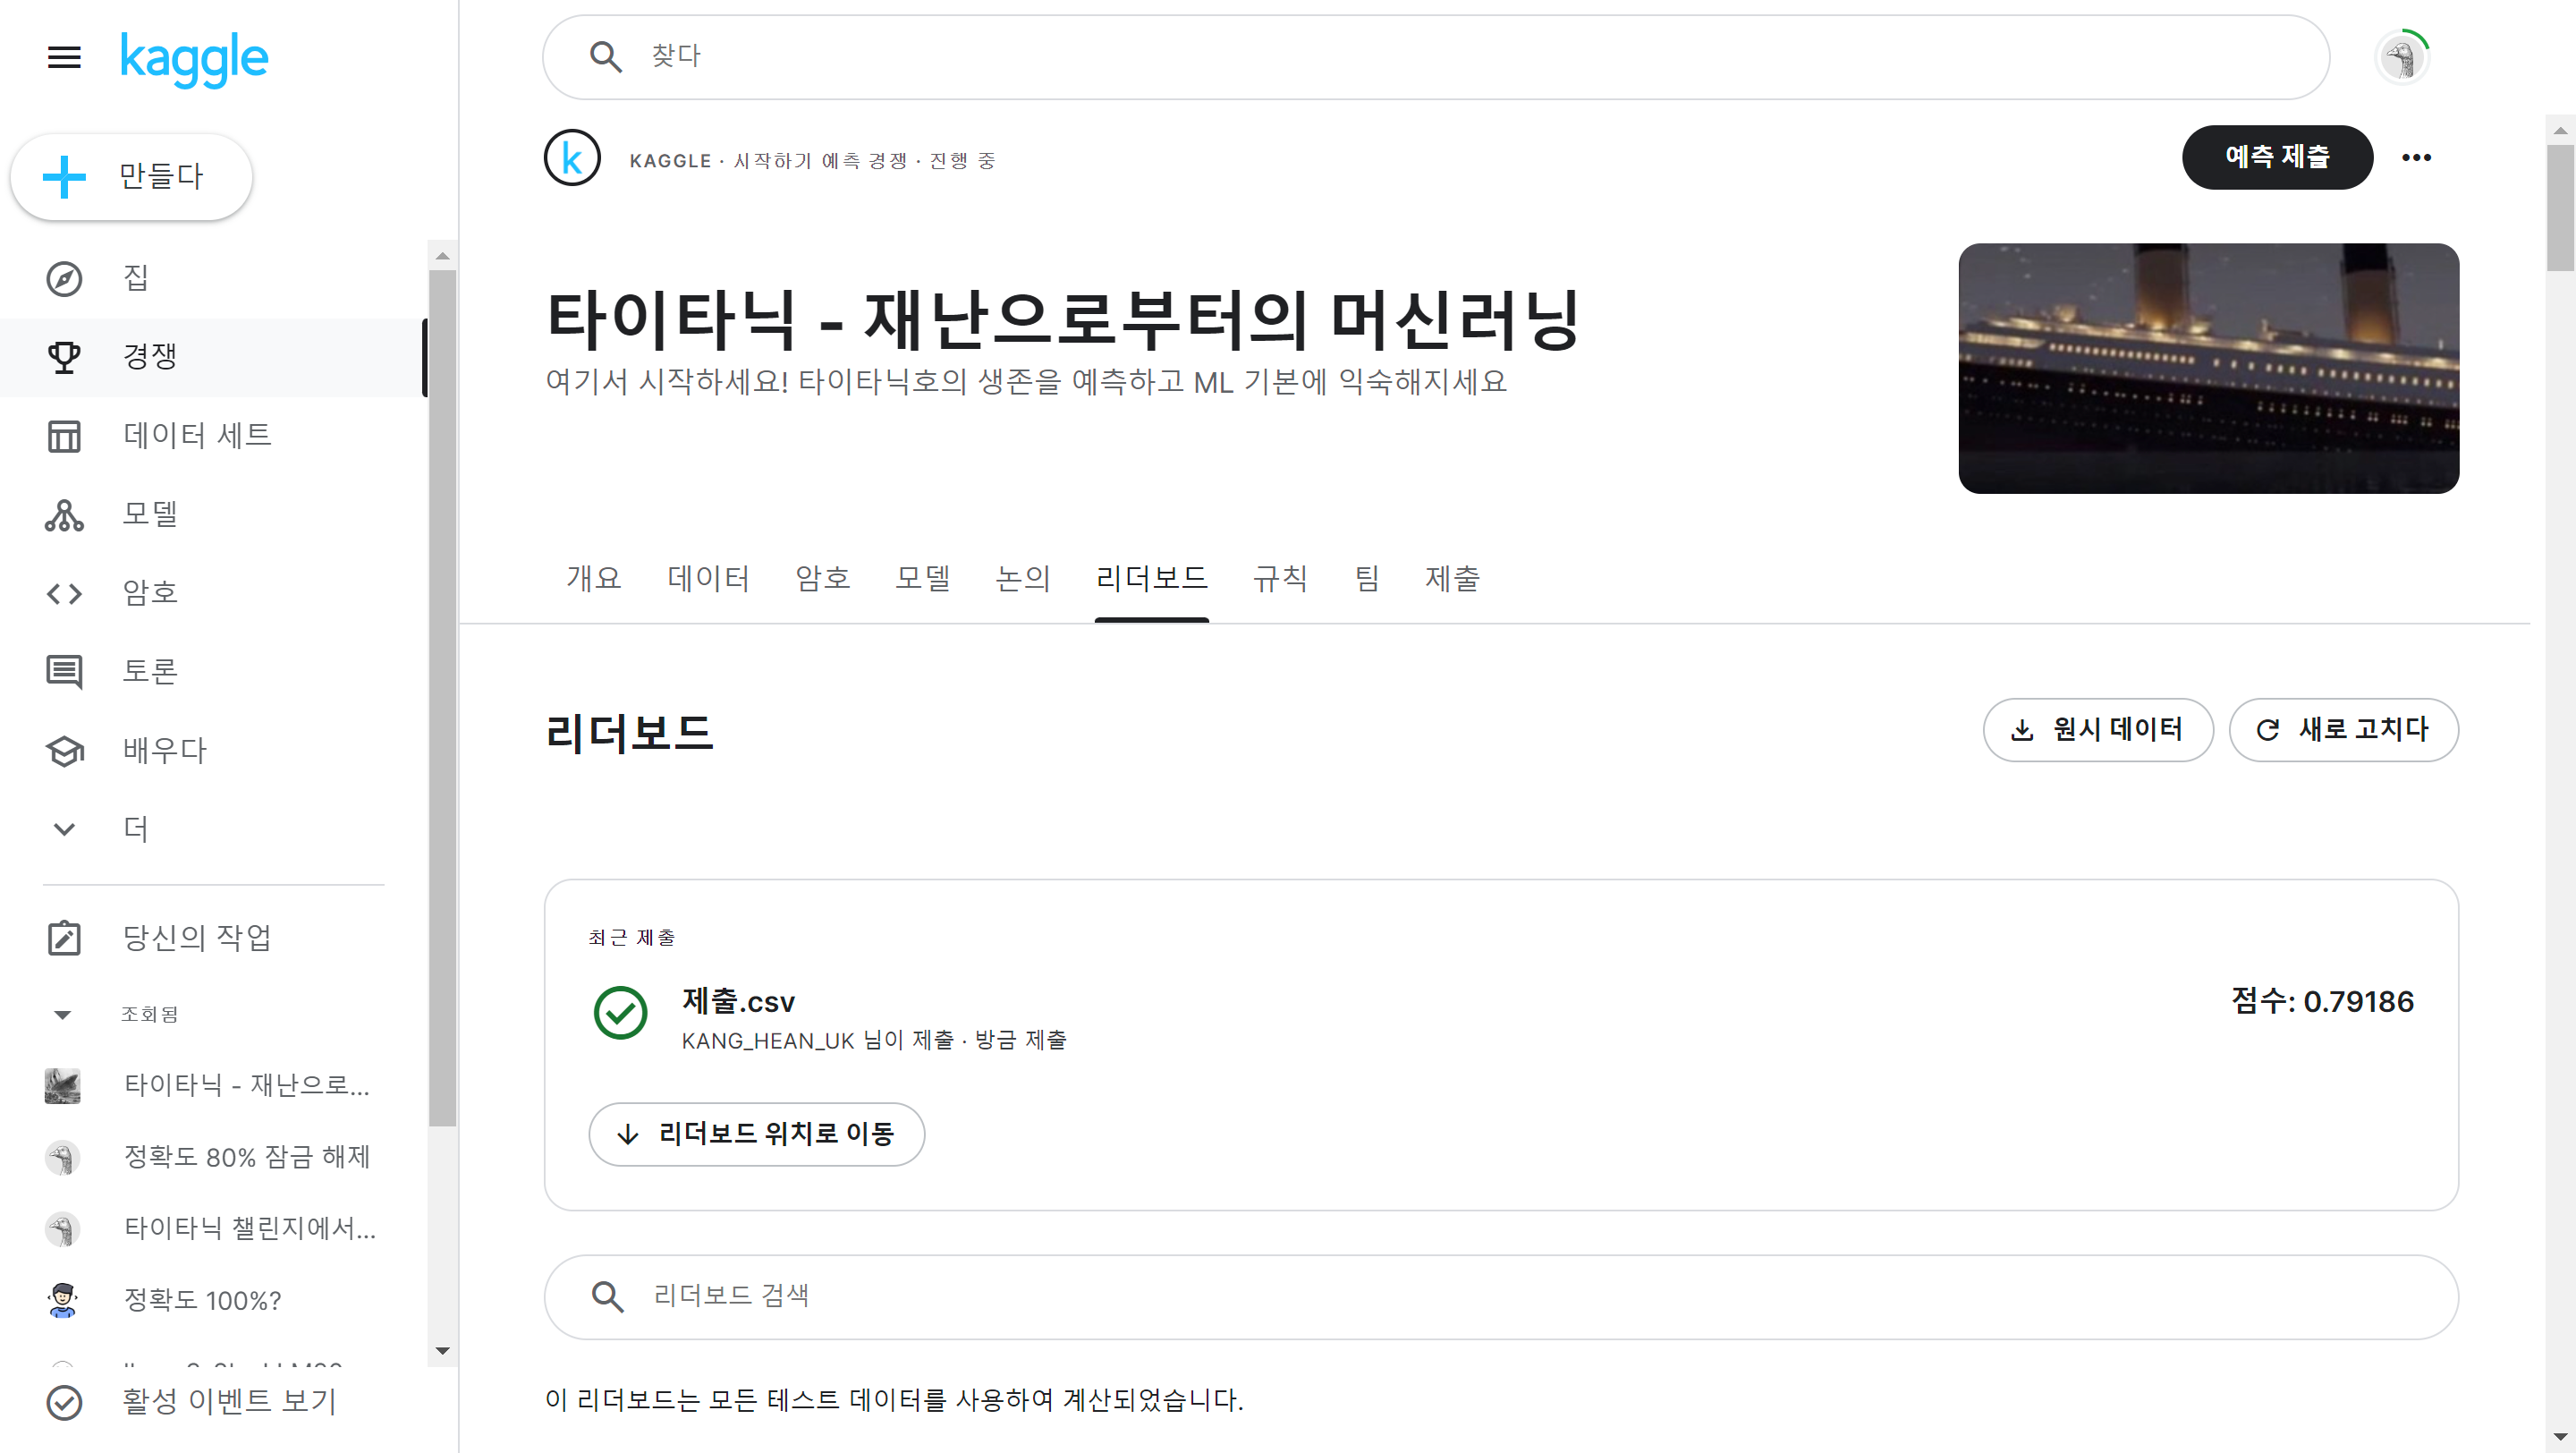